In [1]:
# Import dependencies

import numpy as np
import pandas as pd
import requests
import json
import time

from scipy.stats import linregress
from matplotlib import pyplot as plt

from citipy import citipy

In [2]:
# Import OpenWeather API key

from config import api_key

In [3]:
# Generate a random list of cities with citipy

# Generate a random list of coordinates
# "The valid range of latitude in degrees is -90 and +90 for the southern and northern hemisphere respectively. Longitude is in the range -180 and +180" https://stackoverflow.com/questions/15965166/

latitude = []
longitude = []

for lat in np.random.randint(-90,90,500):
    latitude.append(lat)

for long in np.random.randint(-180,180,500):
    longitude.append(long)

lat_long = []
for i in range(len(latitude)):
    lat_long.append((latitude[i], longitude[i]))

# lat_long = tuple(zip(latitude,longitude))

# lat_long

# Locate nearest cities to coordinates
cities = []

for lat,long in lat_long:
    city = citipy.nearest_city(lat,long)
    city_name = city.city_name
    cities.append(city_name)

# cities

In [5]:
# Testing data retrieval

base_url = "http://api.openweathermap.org/data/2.5/weather?".format(city_name,api_key)
target_url = base_url + "q=" + city_name + "&appid=" + api_key

city_name = "albany"

print("Tesing OpenWeatherMap API")

response = requests.get(target_url)

# print the response URL, avoid doing for public GitHub repos in order to avoid exposing key
# print(response.url)

data_test = response.json()
# print(json.dumps(data_test, indent=4, sort_keys=True))

main = data_test["main"]
temperature = main["temp"] # Fetch temperature
humidity = main["humidity"] # Fetch humidity

wind = data_test["wind"] 
wind_speed = wind["speed"] # Fetch wind speed

clouds = data_test["clouds"]
cloudiness = clouds["all"] # Fetch cloudiness


print(f"{city_name.title():-^30}")
print(f"Temperature: {temperature}")
print(f"Humidity: {humidity}")
print(f"Wind speed: {wind_speed}")
print(f"Cloudiness: {cloudiness}")


Tesing OpenWeatherMap API
------------Albany------------
Temperature: 279.65
Humidity: 93
Wind speed: 2.1
Cloudiness: 75


In [6]:
# Testing data retrieval method 2 (using parameter dictionary)

base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {
    "q": "albany",
    "appid": api_key
}
response = requests.get(base_url, params=params)

# print the response URL, avoid doing for public GitHub repos in order to avoid exposing key
# print(response.url)

data_test = response.json()

temperature = data_test["main"]["temp"] # Fetch temperature
humidity = data_test["main"]["humidity"] # Fetch humidity

# wind = data_test["wind"] 
# wind_speed = wind["speed"] # Fetch wind speed
wind_speed = data_test["wind"]["speed"] # Fetch wind speed


# clouds = data_test["clouds"]
# cloudiness = clouds["all"] # Fetch cloudiness
cloudiness = data_test["clouds"]["all"] # Fetch cloudiness


print(f"{city_name.title():-^30}")
print(f"Temperature: {temperature}")
print(f"Humidity: {humidity}")
print(f"Wind speed: {wind_speed}")
print(f"Cloudiness: {cloudiness}")


------------Albany------------
Temperature: 278.33
Humidity: 83
Wind speed: 3.92
Cloudiness: 52


In [7]:
# Testing data retrieval method 3 (adding parameter for metric units of measurement)

base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {
    "q": "albany",
    "appid": api_key,
    "units": "metric"
}
response = requests.get(base_url, params=params)

# print the response URL, avoid doing for public GitHub repos in order to avoid exposing key
# print(response.url)

data_test = response.json()

temperature = data_test["main"]["temp"] # Fetch temperature
humidity = data_test["main"]["humidity"] # Fetch humidity

# wind = data_test["wind"] 
# wind_speed = wind["speed"] # Fetch wind speed
wind_speed = data_test["wind"]["speed"] # Fetch wind speed


# clouds = data_test["clouds"]
# cloudiness = clouds["all"] # Fetch cloudiness
cloudiness = data_test["clouds"]["all"] # Fetch cloudiness


print(f"{city_name.title():-^30}")
print(f"Temperature: {temperature}")
print(f"Humidity: {humidity}")
print(f"Wind speed: {wind_speed}")
print(f"Cloudiness: {cloudiness}")


------------Albany------------
Temperature: 5.18
Humidity: 83
Wind speed: 3.92
Cloudiness: 52


In [8]:
# Set up a DataFrame to hold city, lat, long, temperature, humidity, wind speed and cloudiness 
weather_df = pd.DataFrame(cities, columns=["city"])
weather_df.head()
# weather_df.info()


# Set up additional columns to hold information
weather_df['latitude'] = latitude
weather_df['longitude'] = longitude
weather_df['temperature'] = ""
weather_df['humidity'] = ""
weather_df['wind speed'] = ""
weather_df['cloudiness'] = ""

weather_df

,city,latitude,longitude,temperature,humidity,wind speed,cloudiness
0,rikitea,-16,-124,,,,
1,lagoa,51,-25,,,,
2,nanortalik,53,-36,,,,
3,belushya guba,87,51,,,,
4,corinto,9,-90,,,,
...,...,...,...,...,...,...,...
495,pevek,82,169,,,,
496,jamestown,-36,-5,,,,
497,port alfred,-73,42,,,,
498,great falls,48,-112,,,,


In [9]:
# Data retrieval

base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {
    "q": "albany",
    "appid": api_key,
    "units": "metric"
}

# Use iterrows to iterate through pandas dataframe
for index, row in weather_df.iterrows():
# for index, row in weather_df.head(n=5).iterrows(): # brief test

    # Get city from weather_df
    city = row['city']

    # Add query to params dict
    params['q'] = city

    # Assemble url and make API request
    print(f"Retrieving Results for Index {index}: {city}")

    # Extract results
    response = requests.get(base_url, params=params).json()
    
    try:
        weather_df.loc[index, "temperature"] = response["main"]["temp"]
        weather_df.loc[index, "humidity"] = response["main"]["humidity"] 
        weather_df.loc[index, "wind speed"] = response["wind"]["speed"]
        weather_df.loc[index, "cloudiness"] = response["clouds"]["all"]
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")


castro
------------
Retrieving Results for Index 416: east london
------------
Retrieving Results for Index 417: okha
------------
Retrieving Results for Index 418: gagnoa
------------
Retrieving Results for Index 419: codrington
------------
Retrieving Results for Index 420: esperance
------------
Retrieving Results for Index 421: yellowknife
------------
Retrieving Results for Index 422: busselton
------------
Retrieving Results for Index 423: punta arenas
------------
Retrieving Results for Index 424: hermanus
------------
Retrieving Results for Index 425: la ronge
------------
Retrieving Results for Index 426: punta arenas
------------
Retrieving Results for Index 427: bilibino
------------
Retrieving Results for Index 428: namatanai
------------
Retrieving Results for Index 429: la ronge
------------
Retrieving Results for Index 430: albany
------------
Retrieving Results for Index 431: cabo san lucas
------------
Retrieving Results for Index 432: xining
------------
Retrieving Re

In [46]:
# Check data in DataFrame
# weather_df

In [11]:
# Save data to CSV
# weather_df.to_csv("weather.csv")

In [106]:
# Read in data again
weather_df = pd.read_csv(
    "weather.csv", dtype="object", encoding="utf-8")
weather_df.head()

,Unnamed: 0,city,latitude,longitude,temperature,humidity,wind speed,cloudiness
0,0,rikitea,-16,-124,24.08,83,6.46,100
1,1,lagoa,51,-25,18.81,91,7.9,100
2,2,nanortalik,53,-36,-2.75,87,6.02,100
3,3,belushya guba,87,51,NaN,NaN,NaN,NaN
4,4,corinto,9,-90,17.84,56,1.79,0


In [107]:
# Convert temperature, humidity, latitude to numeric values
weather_df['temperature'] = pd.to_numeric(weather_df['temperature'], errors='coerce')
weather_df['humidity'] = pd.to_numeric(weather_df['humidity'], errors='coerce')
weather_df['latitude'] = pd.to_numeric(weather_df['latitude'], errors='coerce')


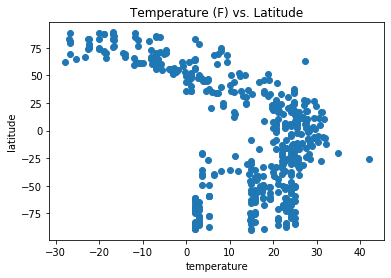

In [101]:
# Scatter plot for Temperature (F) vs. Latitude
x_values = weather_df['temperature'].astype('float')
y_values = weather_df['latitude'].astype('float')
plt.scatter(x_values,y_values)
plt.xlabel('temperature')
plt.ylabel('latitude')
plt.title('Temperature (F) vs. Latitude')
plt.savefig('temp v latitude.png')
plt.show()

The plot shows temperature against latitude for each city in the dataset. At the time of data retrieval, temperatures tended to be higher in the southern hemisphere and lower in the nothern hemisphere.

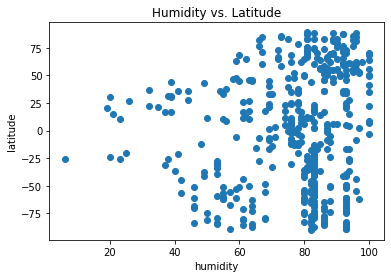

In [92]:
# Scatter plot for Humidity (%) vs. Latitude
x_values = weather_df['humidity'].astype('float')
y_values = weather_df['latitude'].astype('float')
plt.scatter(x_values,y_values)
plt.xlabel('humidity')
plt.ylabel('latitude')
plt.title('Humidity vs. Latitude')
plt.savefig('humidity v latitude.png')
plt.show()

The plot shows humidity against latitude for each city in the dataset. Lower levels of humidity are recorded closer to the equator.

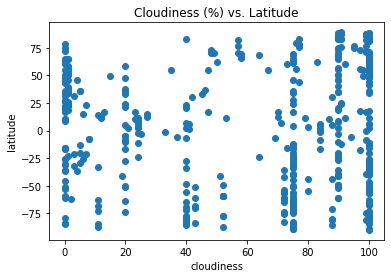

In [93]:
# Scatter plot for cloudiness (%) vs. Latitude
x_values = weather_df['cloudiness'].astype('float')
y_values = weather_df['latitude'].astype('float')
plt.scatter(x_values,y_values)
plt.xlabel('cloudiness')
plt.ylabel('latitude')
plt.title('Cloudiness (%) vs. Latitude')
plt.savefig('cloudiness v latitude.png')
plt.show()

The plot shows cloudiness against latitude for each of the cities in the dataset. The level of cloudiness for the cities in the dataset are relatively evenly spread across the hemispheres.

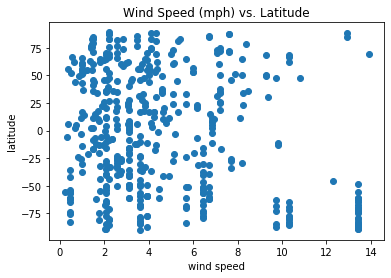

In [94]:
# Scatter plot for Wind Speed (mph) vs. Latitude
x_values = weather_df['wind speed'].astype('float')
y_values = weather_df['latitude'].astype('float')
plt.scatter(x_values,y_values)
plt.xlabel('wind speed')
plt.ylabel('latitude')
plt.title('Wind Speed (mph) vs. Latitude')
plt.savefig('wind speed v latitude.png')
plt.show()

The plot shows wind speed against latitude for each of the cities in the dataset. The windspeed for the cities in the dataset are relatively evenly spread across the hemispheres, although extreme wind speeds are experienced furthest from the equator (i.e. at the north and south poles).

In [135]:
# Remove empty values from weather_df, to enable plotting of linear regression line
weather_clean_df = weather_df.dropna()
# weather_clean_df

In [136]:
# Create separate weather_dfs for northern and southern hemispheres
weather_df_north = weather_clean_df.loc[(weather_clean_df['latitude'] > 0)]
weather_df_south = weather_clean_df.loc[(weather_clean_df['latitude'] < 0)]

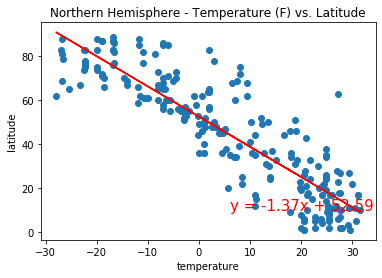

In [139]:
# Test creation of first linear regression plot

# Scatter plot for Northern Hemisphere - Temperature (F) vs. Latitude
x_values = weather_df_north['temperature'].astype('float')
y_values = weather_df_north['latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('temperature')
plt.ylabel('latitude')
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude')

# Save plot
plt.savefig('north temp v latitude.png')

plt.show()

In [141]:
# Create a function to create multiple linear regression plots
def linregress_function(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    # plt.xlabel('temperature')
    plt.ylabel('latitude')
    plt.show()

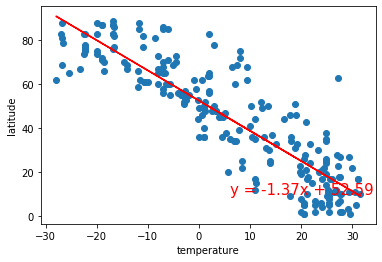

In [142]:
# Linear regression plot for Northern Hemisphere - Temperature (F) vs. Latitude
x_values = weather_df_north['temperature'].astype('float')
y_values = weather_df_north['latitude'].astype('float')
plt.xlabel('temperature')
linregress_function(x_values,y_values)